## What About Streaming?

According to a [report by the Motion Picture Association](https://www.motionpictures.org/wp-content/uploads/2022/03/MPA-2021-THEME-Report-FINAL.pdf), revenue from films released digitally through streaming services such as Netflix, Hulu, Disney+, and Amazon Prime Video increased by **11% in the US** and **24% internationally** from 2020 to 2021. The total revenue generated in 2021 from digital releases globally was **$72 Billion**

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [9]:
box_rev = pd.read_csv('./../Data/bom.movie_gross.csv.gz')
box_rev['total_gross'] = box_rev['domestic_gross'] + box_rev['domestic_gross']
box_rev.head()

box_rev_17_18 = box_rev[(box_rev.year == 2017) | (box_rev.year == 2018)] # unfortunately our data for box office revenue only goes up to the end of 2018
total_box_rev_17_18 = box_rev_17_18['total_gross'].sum()

total_digi_rev_17_18 = 66300000000 # from report numbers, digital 2017 + 2018, international + US

total_digi_rev_17_18 - total_box_rev_17_18


22251047806.0

### Streaming Revenue is Higher Than Box Office Revenue

Even in 2017 & 2018, before people were spending more time at home from the pandemic, streaming revenue was **$22.25 billion more** than box office revenue (according to the Motion Picture Association report above)

In [10]:
netflix = pd.read_csv('./../Data/all-weeks-global.tsv', delimiter='\t') # time frame for this dataset is 6/28/21 to 9/25/22
nf_movies = netflix[netflix['category'].str.contains('Film')]
# nf_movies.to_csv('./../Data/all-weeks-global-films-only.csv')
nf_movies

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-09-25,Films (English),1,Do Revenge,NaN,42550000,2
1,2022-09-25,Films (English),2,Lou,NaN,40570000,1
2,2022-09-25,Films (English),3,Father Stu,NaN,13770000,1
3,2022-09-25,Films (English),4,I Used to Be Famous,NaN,11630000,1
4,2022-09-25,Films (English),5,A Jazzman's Blues,NaN,7820000,1
...,...,...,...,...,...,...,...
2575,2021-07-04,Films (Non-English),6,Security,NaN,2950000,1
2576,2021-07-04,Films (Non-English),7,Murder by the Coast,NaN,2690000,1
2577,2021-07-04,Films (Non-English),8,Xtreme,NaN,2650000,1
2578,2021-07-04,Films (Non-English),9,Rurouni Kenshin: Origins,NaN,2150000,1


In [27]:
top_movies = nf_movies[['show_title','weekly_hours_viewed']].sort_values(by='weekly_hours_viewed', ascending=False)
top_movies.drop_duplicates(subset='show_title', inplace=True)
top100 = top_movies[0:100]
top20 = top_movies[0:20]
top30 = top_movies[0:30]
top50 = top_movies[0:50]

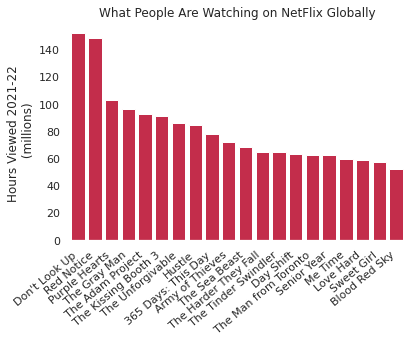

In [15]:
ax = sns.barplot(data=top20, x='show_title', y=top20['weekly_hours_viewed'] / 1000000, color='crimson')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Hours Viewed 2021-22 \n (millions)')
ax.set_xlabel(' ')
ax.set_title('What People Are Watching on NetFlix Globally')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # this turns of scientific notation for numerical vals

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
# plt.show();
plt.savefig('./../Data/netflix_top20_titles_hours.png', bbox_inches='tight')

### The top two movies have significantly more views that the rest
*why is that?*

&nbsp;

The blurb about Netflix's \#1 film, "Don't Look Up" https://www.dontlookup-movie.com/synopsis/
>Two astronomers go on a media tour to warn humankind of a planet-killing comet hurtling toward Earth. The response from a distracted world: Meh.

Compared with Netflix's description of "Red Notice" https://www.netflix.com/title/81161626
>An FBI profiler pursuing the world's most wanted art thief becomes his reluctant partner in crime to catch an elusive crook who's always one step ahead.

The two don't seem to have much in common, story-wise.

&nbsp;

&nbsp;


### Genre as a Driver of Interest

Let's look at the genres of the top 20 streamed movies in the 2021-2022 span
&nbsp;

&nbsp;



In [13]:
top20_genres = ['Comedy', 'Action', 'Music', 'Action', 'Action', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Documentary', 'Action', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Action', 'Action'] # hard coded from Netflix's website listing for each movie or IMDB, since Netflix's provided .tsv didn't include genre. Romatic Comedy coded as Comedy
len(top20_genres)

top20['genre'] = top20_genres

<ipython-input-13-909828660f8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20['genre'] = top20_genres


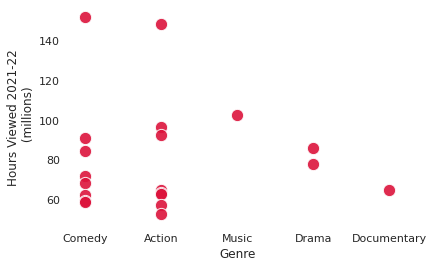

In [14]:

ax = sns.scatterplot(x=top20['genre'], y=top20['weekly_hours_viewed'] / 1000000, color='crimson', legend=False, s=150, alpha=0.90)
# ax.bar(top20['genre'], top20['weekly_hours_viewed'], width=width, bottom=0.0, color='red', alpha=0.5)
ax.set_ylabel('Hours Viewed 2021-22 \n (millions)')
ax.set_xlabel('Genre')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})

plt.savefig('./../Data/top20_genres.png', bbox_inches='tight')
# plt.show();

The number of dots represent the different movies. We can see that both in total hours watched and number movies in each genre, **comedy** and **action** are the most represented genres

Our other datasets included data on films up til 2019. In those, comedy was farther from the top spot. Did the need to laugh increase after 2020?

Netflix also represents at-home viewing. Streaming is a different market than box-office. If Microsoft Movie Studio is planning a streaming service or delivering content to viewers at home, comedy should be something to consider

In [ ]:
#For EDA, looking at titles plot with top100 instead of 20
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(50, 30))

ax = sns.barplot(data=top100, x='show_title', y=top100['weekly_hours_viewed'] / 1000000, color='crimson')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Hours Viewed 6/28/21 - 9/25/22')
ax.set_xlabel(' ')
ax.set_title('What People Are Watching on NetFlix Globally')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # this turns of scientific notation for numerical vals


plt.show();
# plt.savefig('./../Images/netflix_top100_titles_hours.png', bbox_inches='tight')